In [1]:
using QuantumOptics
using PyPlot

In [2]:
w_r = 2*pi*5       # frequency in GHz
w_d = 2*pi*5     # coupling b/t pump and atom
Ω = .008 

0.008

In [3]:
basis = SpinBasis(1//2)
a = sigmam(basis)
a_dra = sigmap(basis)

Operator(dim=2x2)
  basis: Spin(1/2)
     ⋅      1.0+0.0im
     ⋅          ⋅    

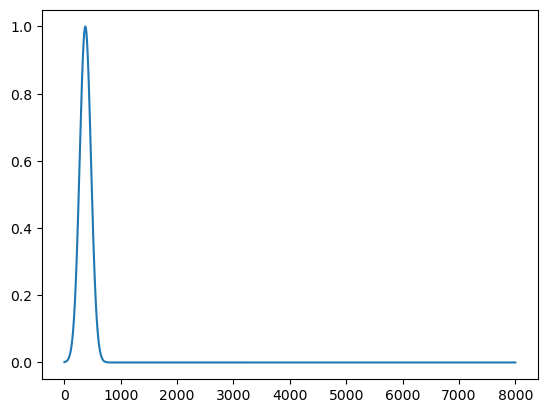

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000013E112950>

In [13]:
tlist = 0:.01:8000;
t_s = [ exp(-(.00005)*(t-371.69)^2) for t in tlist]
plot(tlist, t_s)

In [18]:
function guassian(t,c,k,w)
    if (t < (k/2))
        f = exp(-c*(t - k)^2)
    else 
        f = 1

    end
    return f
end

guassian (generic function with 1 method)

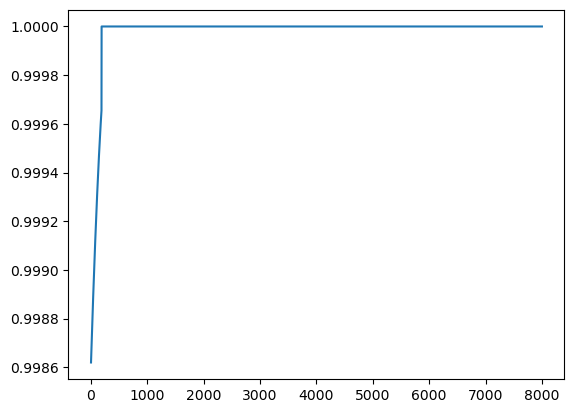

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000EA3339A0>

In [29]:
tlist = 0:.01:8000;
t_s = [ guassian(t,0.00000001,371.69, 500) for t in tlist]
plot(tlist, t_s)

In [30]:
ϕ = .785398

0.785398

In [31]:
function H_g(t, ρ)
    
    H_f = .5*Ω*guassian(t,0.00005,371.69, 500)*(sin(ϕ)*cos(w_d*t)+cos(ϕ)*sin(w_d*t))*(cos(w_r*t)*sigmay(basis) + sin(w_r*t)*sigmax(basis)) 
    
    return H_f  
    
end

H_g (generic function with 1 method)

In [32]:
# Initial state
#ψ0 = fockstate(basis,1);
ψ0 = spinup(basis)
time = [0:.1:8000;];
#time = [0:.1:10;];


In [33]:
tout, ρ = timeevolution.schroedinger_dynamic(time, ψ0, H_g);

In [34]:
si = real(expect(sigmaz(basis), ρ));

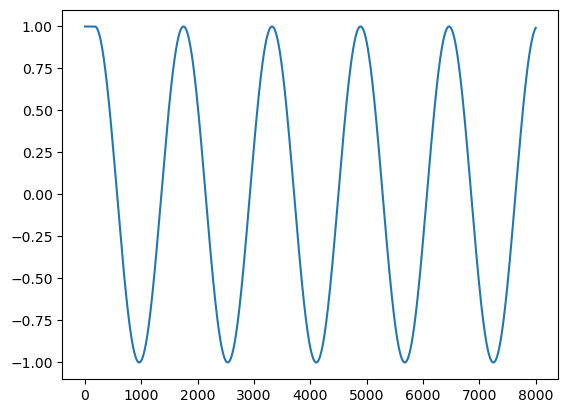

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000EA354550>

In [35]:
plot(tout, si)